In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df1 = pd.read_csv("mosto1.csv")



In [4]:
df1['TimeStamp'] = pd.to_datetime(df1['TimeStamp'])


In [5]:
print(df1['TimeStamp'].head())

0   2024-07-01 06:00:00
1   2024-07-01 06:01:00
2   2024-07-01 06:02:00
3   2024-07-01 06:03:00
4   2024-07-01 06:04:00
Name: TimeStamp, dtype: datetime64[ns]


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43201 entries, 0 to 43200
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TimeStamp         43201 non-null  datetime64[ns]
 1   Time Zone         43201 non-null  object        
 2   G100CP2_FT420201  43201 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1012.7+ KB


In [7]:
df1 = df1.replace('<Bad Data>', np.nan)

In [8]:
df1.isna().sum()

TimeStamp           0
Time Zone           0
G100CP2_FT420201    0
dtype: int64

In [9]:
df1 = df1.drop(columns = ['Time Zone'])

In [10]:
# Lista de colunas para converter
columns_to_convert = ['G100CP2_FT420201' ]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df1[column] = df1[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [11]:
df1.describe()

,TimeStamp,G100CP2_FT420201
count,43201,43201.000000
mean,2024-07-16 06:00:00,5495.590422
min,2024-07-01 06:00:00,0.000000
25%,2024-07-08 18:00:00,0.000000
50%,2024-07-16 06:00:00,0.000000
75%,2024-07-23 18:00:00,17172.880000
max,2024-07-31 06:00:00,31142.810000
std,NaN,8822.165577


In [12]:
df1 = df1[df1['G100CP2_FT420201'] != 0]

In [13]:
df1.describe()

,TimeStamp,G100CP2_FT420201
count,12428,12428.000000
mean,2024-07-16 07:01:36.638236160,19103.234780
min,2024-07-01 06:00:00,328.660000
25%,2024-07-09 12:05:45,18552.000000
50%,2024-07-16 09:43:30,19639.935000
75%,2024-07-22 19:00:15,21038.652500
max,2024-07-31 02:08:00,31142.810000
std,NaN,3254.491555


In [14]:
df1.isna().sum()

TimeStamp           0
G100CP2_FT420201    0
dtype: int64

In [15]:
total_vazao2 = df1["G100CP2_FT420201"].sum()

In [16]:
total_vazao2

237415001.84000003

In [17]:
df1['TimeStamp'] = pd.to_datetime(df1['TimeStamp'])


df1_hourly = df1.groupby(df1['TimeStamp'].dt.floor('H')).mean()

# Finalmente, vamos somar todas as médias para obter o totalizador mensal
total_vazao_mensal = df1_hourly["G100CP2_FT420201"].sum()

print(f"A quantidade total de vazão que passou pelo medidor ao longo do mês é Z09: {total_vazao_mensal}")

A quantidade total de vazão que passou pelo medidor ao longo do mês é Z09: 4712007.255532485


# Condição para Adições(FS/H2O)

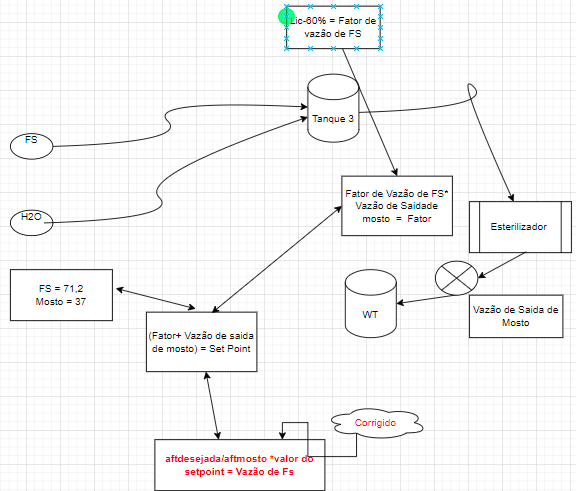

In [18]:
from IPython.display import Image


Image(filename='Sem título.png')


# Balanço de Massa 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [20]:
pd.set_option('display.max_columns', 100)

In [21]:
df = pd.read_csv("mosto21.csv")


In [22]:
df

,TimeStamp,Time Zone,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao AGUARDANDO DESCRIÇAO,Transmissor de Vazao AGUARDANDO DESCRIÇAO.1
0,7/31/2024 5:49,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0
1,7/31/2024 5:50,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0
2,7/31/2024 5:51,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0
3,7/31/2024 5:52,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0
4,7/31/2024 5:53,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
601,7/31/2024 15:50,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0
602,7/31/2024 15:51,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0
603,7/31/2024 15:52,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0
604,7/31/2024 15:53,GMT-3.0,25.0,0,37,71.28,0,"26,983.12",0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 11 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   TimeStamp                                                         606 non-null    object 
 1   Time Zone                                                         606 non-null    object 
 2   Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO  606 non-null    float64
 3   VAZAO DE MOSTO CALCULADA                                          606 non-null    object 
 4   AFT DESEJADA NO MOSTO FINAL                                       606 non-null    int64  
 5   AFT DO FS FINAL                                                   606 non-null    object 
 6   Controlador Indicador de Vazao SP ALIMENTACAO DE FS               606 non-null    object 
 7   Controlador Indicador de Vazao SP A

In [24]:
df.replace("<Bad Data>", np.nan, inplace=True)


In [25]:
df.isna().sum()

TimeStamp                                                            0
Time Zone                                                            0
Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO     0
VAZAO DE MOSTO CALCULADA                                             0
AFT DESEJADA NO MOSTO FINAL                                          0
AFT DO FS FINAL                                                     26
Controlador Indicador de Vazao SP ALIMENTACAO DE FS                 26
Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO              25
Transmissor de Vazao MOSTO ESTERILIZADOR 2                           7
Transmissor de Vazao AGUARDANDO DESCRIÇAO                           26
Transmissor de Vazao AGUARDANDO DESCRIÇAO.1                         26
dtype: int64

In [26]:
# Lista de colunas para converter
columns_to_convert = ['AFT DO FS FINAL', 'VAZAO DE MOSTO CALCULADA','Controlador Indicador de Vazao SP ALIMENTACAO DE FS','Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO','Transmissor de Vazao AGUARDANDO DESCRIÇAO','Transmissor de Vazao AGUARDANDO DESCRIÇAO.1' ]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)


In [27]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao MOSTO ESTERILIZADOR 2' ]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 11 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   TimeStamp                                                         606 non-null    object 
 1   Time Zone                                                         606 non-null    object 
 2   Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO  606 non-null    float64
 3   VAZAO DE MOSTO CALCULADA                                          606 non-null    float64
 4   AFT DESEJADA NO MOSTO FINAL                                       606 non-null    int64  
 5   AFT DO FS FINAL                                                   580 non-null    float64
 6   Controlador Indicador de Vazao SP ALIMENTACAO DE FS               580 non-null    float64
 7   Controlador Indicador de Vazao SP A

In [29]:
df.head()


,TimeStamp,Time Zone,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao AGUARDANDO DESCRIÇAO,Transmissor de Vazao AGUARDANDO DESCRIÇAO.1
0,7/31/2024 5:49,GMT-3.0,25.0,0.0,37,71.28,0.0,26983.12,0.0,0.0,0.0
1,7/31/2024 5:50,GMT-3.0,25.0,0.0,37,71.28,0.0,26983.12,0.0,0.0,0.0
2,7/31/2024 5:51,GMT-3.0,25.0,0.0,37,71.28,0.0,26983.12,0.0,0.0,0.0
3,7/31/2024 5:52,GMT-3.0,25.0,0.0,37,71.28,0.0,26983.12,0.0,0.0,0.0
4,7/31/2024 5:53,GMT-3.0,25.0,0.0,37,71.28,0.0,26983.12,0.0,0.0,0.0


In [30]:
df.isna().sum()


TimeStamp                                                            0
Time Zone                                                            0
Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO     0
VAZAO DE MOSTO CALCULADA                                             0
AFT DESEJADA NO MOSTO FINAL                                          0
AFT DO FS FINAL                                                     26
Controlador Indicador de Vazao SP ALIMENTACAO DE FS                 26
Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO              25
Transmissor de Vazao MOSTO ESTERILIZADOR 2                           7
Transmissor de Vazao AGUARDANDO DESCRIÇAO                           26
Transmissor de Vazao AGUARDANDO DESCRIÇAO.1                         26
dtype: int64

In [31]:
df.describe()


,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao AGUARDANDO DESCRIÇAO,Transmissor de Vazao AGUARDANDO DESCRIÇAO.1
count,606.000000,606.000000,606.0,5.800000e+02,580.000000,581.000000,599.000000,580.000000,580.000000
mean,40.193927,27373.174736,37.0,7.128000e+01,11956.199362,21363.809071,28323.254992,12086.136069,12651.471879
std,11.100423,17597.440124,0.0,5.831480e-13,9889.575110,5704.400459,18207.406595,9684.195062,9672.084690
min,18.750000,0.000000,37.0,7.128000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,37.0,7.128000e+01,0.000000,18253.280000,0.000000,0.000000,0.000000
50%,45.730000,37621.630000,37.0,7.128000e+01,19294.345000,19274.380000,39991.270000,19294.925000,17999.060000
75%,48.200000,39722.787500,37.0,7.128000e+01,20391.260000,26983.120000,40002.700000,20358.712500,19005.275000
max,59.970000,44167.580000,37.0,7.128000e+01,21324.530000,39975.000000,53272.340000,21333.910000,38489.030000


In [32]:

df = df.rename(columns={"Transmissor de Vazao AGUARDANDO DESCRIÇAO": "Transmissor de Vazao de FS"})



In [33]:
df = df.rename(columns={"Transmissor de Vazao AGUARDANDO DESCRIÇAO.1": "Transmissor de Vazao de H2O"})


In [34]:
df.describe()

,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao de FS,Transmissor de Vazao de H2O
count,606.000000,606.000000,606.0,5.800000e+02,580.000000,581.000000,599.000000,580.000000,580.000000
mean,40.193927,27373.174736,37.0,7.128000e+01,11956.199362,21363.809071,28323.254992,12086.136069,12651.471879
std,11.100423,17597.440124,0.0,5.831480e-13,9889.575110,5704.400459,18207.406595,9684.195062,9672.084690
min,18.750000,0.000000,37.0,7.128000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,37.0,7.128000e+01,0.000000,18253.280000,0.000000,0.000000,0.000000
50%,45.730000,37621.630000,37.0,7.128000e+01,19294.345000,19274.380000,39991.270000,19294.925000,17999.060000
75%,48.200000,39722.787500,37.0,7.128000e+01,20391.260000,26983.120000,40002.700000,20358.712500,19005.275000
max,59.970000,44167.580000,37.0,7.128000e+01,21324.530000,39975.000000,53272.340000,21333.910000,38489.030000


In [35]:
df["Transmissor de Vazao de H2O"] = df["Transmissor de Vazao de H2O"].fillna(12651.47)

In [36]:
df["Transmissor de Vazao de FS"] = df["Transmissor de Vazao de FS"].fillna(12086.13)

In [37]:
df["Transmissor de Vazao MOSTO ESTERILIZADOR 2"] = df["Transmissor de Vazao MOSTO ESTERILIZADOR 2"].fillna(28323.25)

In [38]:
df["Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO"] = df["Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO"].fillna(21363.80)

In [39]:
df["Controlador Indicador de Vazao SP ALIMENTACAO DE FS"] = df["Controlador Indicador de Vazao SP ALIMENTACAO DE FS"].fillna(11956.19)

In [40]:
df["AFT DO FS FINAL"] = df["AFT DO FS FINAL"].fillna(0.712)

In [41]:
df["Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO"] = df["Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO"] / 100


In [42]:
df["AFT DESEJADA NO MOSTO FINAL"] = df["AFT DESEJADA NO MOSTO FINAL"] / 100

In [43]:
df["AFT DO FS FINAL"] = df["AFT DO FS FINAL"] / 100

In [44]:
df.describe()

,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao de FS,Transmissor de Vazao de H2O
count,606.000000,606.000000,6.060000e+02,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,0.401939,27373.174736,3.700000e-01,0.682523,11956.198960,21363.808696,28323.254934,12086.135809,12651.471799
std,0.111004,17597.440124,2.888964e-15,0.143118,9674.738333,5585.297563,18101.768036,9473.819872,9461.972579
min,0.187500,0.000000,3.700000e-01,0.007120,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,3.700000e-01,0.712800,0.000000,18289.530000,0.000000,0.000000,0.000000
50%,0.457300,37621.630000,3.700000e-01,0.712800,19262.315000,19351.640000,39991.025000,19256.485000,17944.145000
75%,0.482000,39722.787500,3.700000e-01,0.712800,20341.030000,26983.120000,40002.510000,20307.410000,18967.537500
max,0.599700,44167.580000,3.700000e-01,0.712800,21324.530000,39975.000000,53272.340000,21333.910000,38489.030000




# Calculo para 0.6

In [45]:
df['Fator Vazão'] = (df['Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO'] - 0.6)*-1


In [46]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-31 06:59:00', '2024-07-31 14:02:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe1 = []
for start, end in time_limits:
    mask = (df['TimeStamp'] >= start) & (df['TimeStamp'] <= end)
    df_temp = df.loc[mask]
    dataframe1.append(df_temp)

In [47]:
Mosto_final= pd.concat(dataframe1)

In [48]:
Mosto_final.describe()

,TimeStamp,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao de FS,Transmissor de Vazao de H2O,Fator Vazão
count,424,424.000000,424.000000,4.240000e+02,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,2024-07-31 10:30:30,0.467158,38197.753750,3.700000e-01,0.669527,17088.340967,19830.638561,39237.544316,16848.916675,17685.961887,0.132842
min,2024-07-31 06:59:00,0.187500,2092.380000,3.700000e-01,0.007120,0.000000,0.000000,2411.720000,0.000000,0.000000,0.000300
25%,2024-07-31 08:44:45,0.454325,37400.367500,3.700000e-01,0.712800,19230.075000,18114.820000,39986.810000,19178.107500,17881.562500,0.111400
50%,2024-07-31 10:30:30,0.473550,38944.230000,3.700000e-01,0.712800,19793.765000,18948.985000,39997.600000,19768.440000,18531.875000,0.126450
75%,2024-07-31 12:16:15,0.488600,40056.005000,3.700000e-01,0.712800,20686.547500,19600.222500,40008.625000,20664.170000,19234.137500,0.145675
max,2024-07-31 14:02:00,0.599700,44167.580000,3.700000e-01,0.712800,21324.530000,39975.000000,41907.190000,21333.910000,38489.030000,0.412500
std,NaN,0.058542,4758.217269,2.223069e-15,0.169505,6779.824729,4707.508536,4346.784507,7017.240947,6367.904484,0.058542


In [49]:
Mosto_final['Vazão de Mosto Desejada'] = Mosto_final['Fator Vazão'] * Mosto_final['Transmissor de Vazao MOSTO ESTERILIZADOR 2']

In [50]:
Mosto_final['valor do setpoint'] = Mosto_final['Transmissor de Vazao MOSTO ESTERILIZADOR 2'] + Mosto_final['Vazão de Mosto Desejada']

In [51]:
Mosto_final['Vazão de FS'] = (Mosto_final['AFT DESEJADA NO MOSTO FINAL'] *1.12 / Mosto_final['AFT DO FS FINAL'] ) * Mosto_final['valor do setpoint']


In [52]:
Mosto_final['entrada de agua'] = ((Mosto_final['AFT DO FS FINAL'] - Mosto_final['AFT DESEJADA NO MOSTO FINAL']) / Mosto_final['AFT DESEJADA NO MOSTO FINAL']) * Mosto_final['Transmissor de Vazao de H2O']


In [53]:
Mosto_final.describe()

,TimeStamp,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao de FS,Transmissor de Vazao de H2O,Fator Vazão,Vazão de Mosto Desejada,valor do setpoint,Vazão de FS,entrada de agua
count,424,424.000000,424.000000,4.240000e+02,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,424.000000
mean,2024-07-31 10:30:30,0.467158,38197.753750,3.700000e-01,0.669527,17088.340967,19830.638561,39237.544316,16848.916675,17685.961887,0.132842,5098.413055,44335.957371,1.724183e+05,14906.169789
min,2024-07-31 06:59:00,0.187500,2092.380000,3.700000e-01,0.007120,0.000000,0.000000,2411.720000,0.000000,0.000000,0.000300,10.170117,3255.822000,1.892835e+03,-12408.014685
25%,2024-07-31 08:44:45,0.454325,37400.367500,3.700000e-01,0.712800,19230.075000,18114.820000,39986.810000,19178.107500,17881.562500,0.111400,4388.371287,44366.799015,2.581697e+04,16567.026014
50%,2024-07-31 10:30:30,0.473550,38944.230000,3.700000e-01,0.712800,19793.765000,18948.985000,39997.600000,19768.440000,18531.875000,0.126450,5015.902243,44977.347991,2.621986e+04,17169.531757
75%,2024-07-31 12:16:15,0.488600,40056.005000,3.700000e-01,0.712800,20686.547500,19600.222500,40008.625000,20664.170000,19234.137500,0.145675,5768.912425,45761.968252,2.671283e+04,17820.168473
max,2024-07-31 14:02:00,0.599700,44167.580000,3.700000e-01,0.712800,21324.530000,39975.000000,41907.190000,21333.910000,38489.030000,0.412500,14250.246500,54965.236500,2.755687e+06,35659.566173
std,NaN,0.058542,4758.217269,2.223069e-15,0.169505,6779.824729,4707.508536,4346.784507,7017.240947,6367.904484,0.058542,2054.782035,5120.797544,5.802571e+05,9068.398232


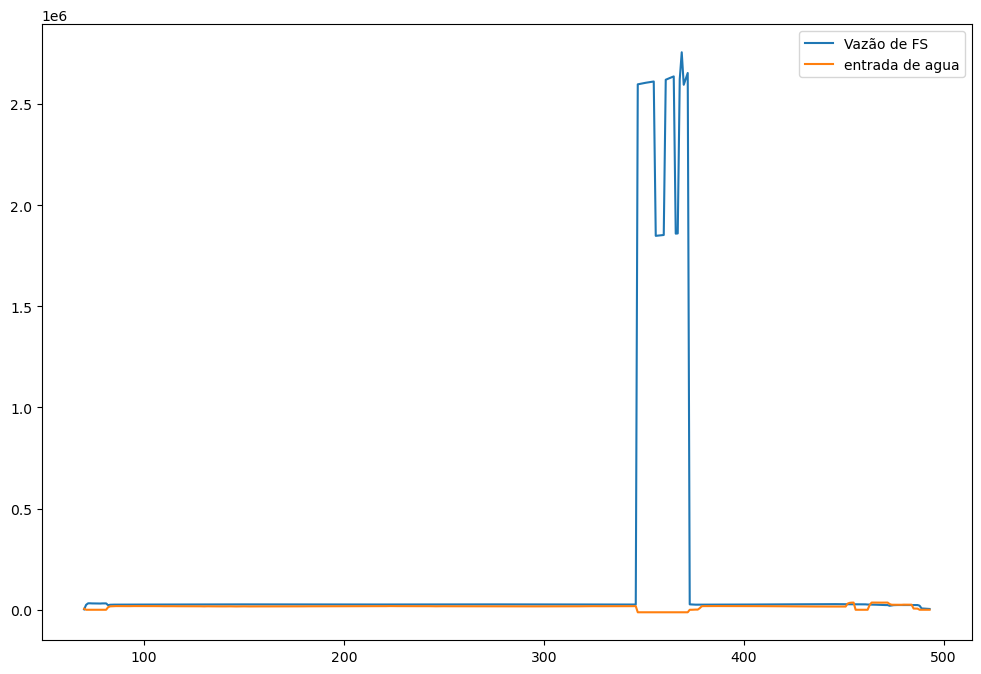

In [54]:
## 0,6
Mosto_final[['Vazão de FS', 'entrada de agua']].plot(figsize=(12, 8))
plt.show()


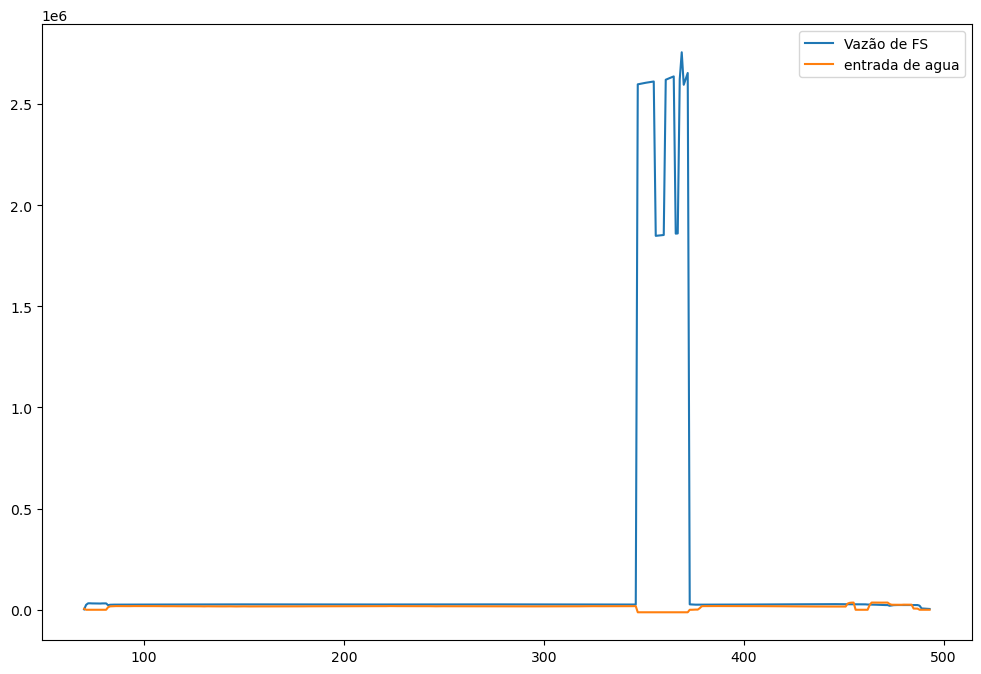

In [55]:

Mosto_final[['Vazão de FS', 'entrada de agua']].plot(figsize=(12, 8))
plt.show()


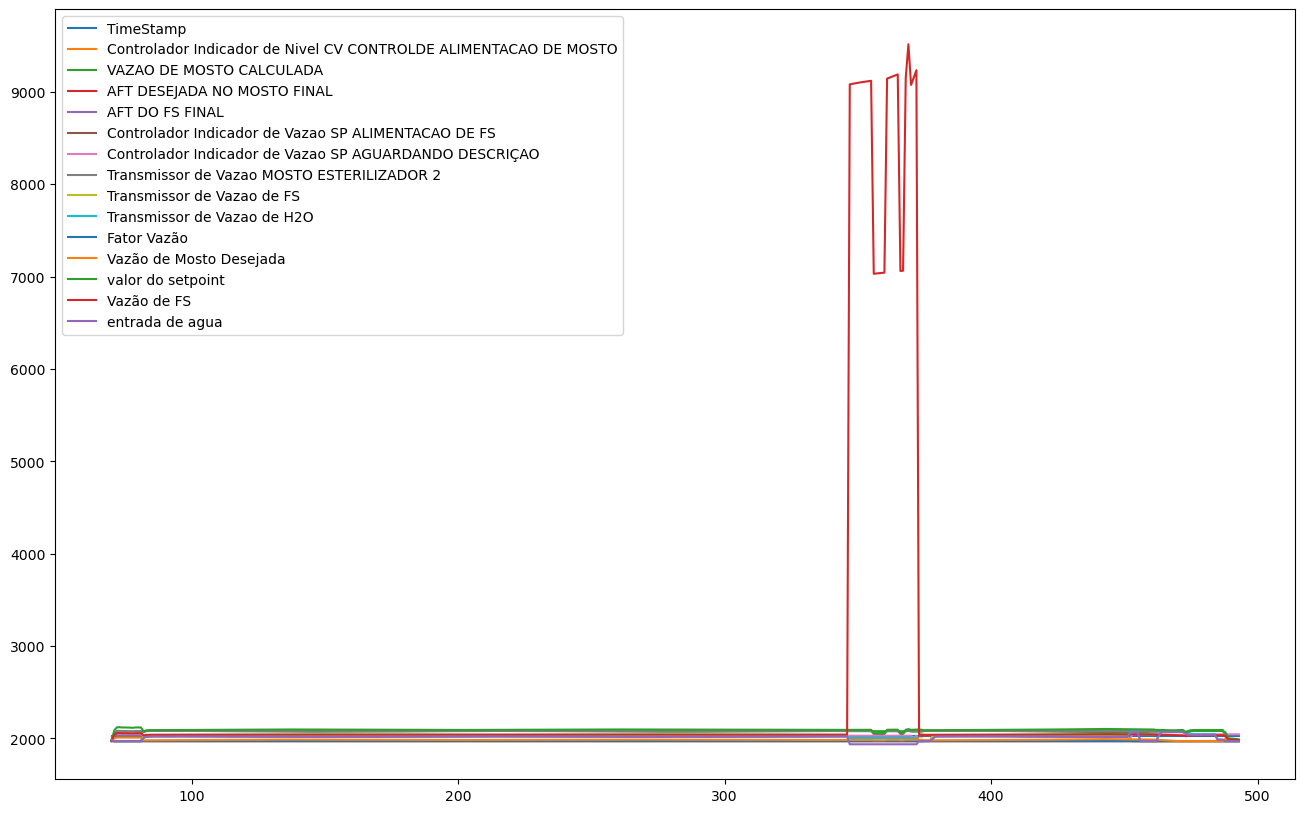

In [56]:

Mosto_final.plot(figsize=(16, 10))
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   TimeStamp                                                         606 non-null    datetime64[ns]
 1   Time Zone                                                         606 non-null    object        
 2   Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO  606 non-null    float64       
 3   VAZAO DE MOSTO CALCULADA                                          606 non-null    float64       
 4   AFT DESEJADA NO MOSTO FINAL                                       606 non-null    float64       
 5   AFT DO FS FINAL                                                   606 non-null    float64       
 6   Controlador Indicador de Vazao SP ALIMENTACAO DE FS               606 non-

In [58]:

Mosto_final['TimeStamp'] = pd.to_datetime(Mosto_final['TimeStamp'])


Mosto_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame para frequência horária e imprime a coluna 'Transmissor de Vazao de FS'
print(Mosto_final['Transmissor de Vazao de FS'].resample('H').mean())


TimeStamp
2024-07-31 06:00:00     5047.030000
2024-07-31 07:00:00    16896.559833
2024-07-31 08:00:00    19567.818167
2024-07-31 09:00:00    20645.554333
2024-07-31 10:00:00    19502.573833
2024-07-31 11:00:00    17119.982833
2024-07-31 12:00:00    18612.935000
2024-07-31 13:00:00     6636.136667
2024-07-31 14:00:00        0.000000
Freq: H, Name: Transmissor de Vazao de FS, dtype: float64


In [59]:
print(Mosto_final['Vazão de FS'].resample('H').mean().sum())

1224867.547976294


# calculo para 0.5

In [60]:
df['fator vazão'] = (df['Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO'] - 0.5)*-1

In [61]:

df['Vazão de Mosto Desejada'] = df['Fator Vazão'] * df['Transmissor de Vazao MOSTO ESTERILIZADOR 2']


In [62]:
df['valor do setpoint'] = df['Transmissor de Vazao MOSTO ESTERILIZADOR 2'] + df['Vazão de Mosto Desejada']

In [63]:
df['Vazão de FS'] = (df['AFT DESEJADA NO MOSTO FINAL'] + 0.0001/ df['AFT DO FS FINAL'] ) * df['valor do setpoint']

In [64]:
df['entrada de agua'] = ((df['AFT DO FS FINAL'] - df['AFT DESEJADA NO MOSTO FINAL']) / df['AFT DESEJADA NO MOSTO FINAL']) * df['Transmissor de Vazao de H2O']


In [65]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-31 06:59:00', '2024-07-31 14:02:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe2 = []
for start, end in time_limits:
    mask = (df['TimeStamp'] >= start) & (df['TimeStamp'] <= end)
    df_temp = df.loc[mask]
    dataframe2.append(df_temp)

In [66]:
Mosto_final2= pd.concat(dataframe2)

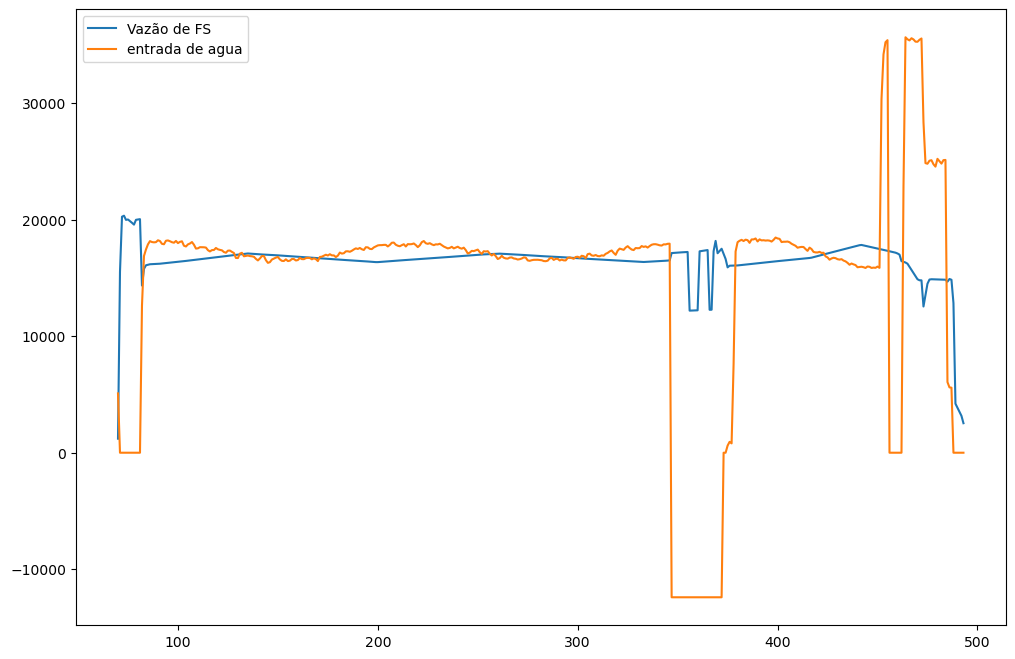

In [67]:
## 0,5
Mosto_final2[['Vazão de FS', 'entrada de agua']].plot(figsize=(12, 8))
plt.show()


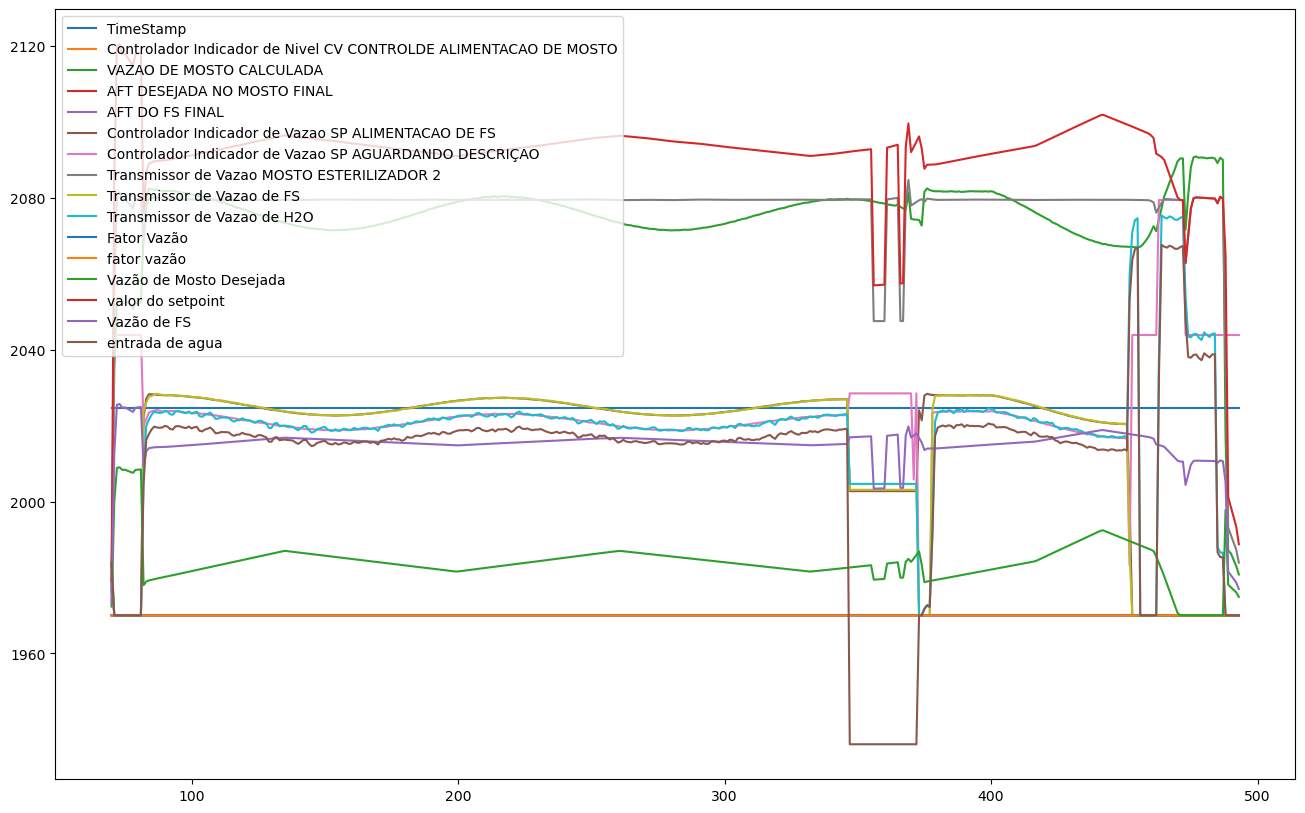

In [68]:
Mosto_final2.plot(figsize=(16, 10))
plt.show()

In [69]:
Mosto_final2.describe()
## -0,6

,TimeStamp,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao de FS,Transmissor de Vazao de H2O,Fator Vazão,fator vazão,Vazão de Mosto Desejada,valor do setpoint,Vazão de FS,entrada de agua
count,424,424.000000,424.000000,4.240000e+02,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,2024-07-31 10:30:30,0.467158,38197.753750,3.700000e-01,0.669527,17088.340967,19830.638561,39237.544316,16848.916675,17685.961887,0.132842,0.032842,5098.413055,44335.957371,16445.910956,14906.169789
min,2024-07-31 06:59:00,0.187500,2092.380000,3.700000e-01,0.007120,0.000000,0.000000,2411.720000,0.000000,0.000000,0.000300,-0.099700,10.170117,3255.822000,1205.110905,-12408.014685
25%,2024-07-31 08:44:45,0.454325,37400.367500,3.700000e-01,0.712800,19230.075000,18114.820000,39986.810000,19178.107500,17881.562500,0.111400,0.011400,4388.371287,44366.799015,16421.939934,16567.026014
50%,2024-07-31 10:30:30,0.473550,38944.230000,3.700000e-01,0.712800,19793.765000,18948.985000,39997.600000,19768.440000,18531.875000,0.126450,0.026450,5015.902243,44977.347991,16676.348457,17169.531757
75%,2024-07-31 12:16:15,0.488600,40056.005000,3.700000e-01,0.712800,20686.547500,19600.222500,40008.625000,20664.170000,19234.137500,0.145675,0.045675,5768.912425,45761.968252,16990.163349,17820.168473
max,2024-07-31 14:02:00,0.599700,44167.580000,3.700000e-01,0.712800,21324.530000,39975.000000,41907.190000,21333.910000,38489.030000,0.412500,0.312500,14250.246500,54965.236500,20344.848677,35659.566173
std,NaN,0.058542,4758.217269,2.223069e-15,0.169505,6779.824729,4707.508536,4346.784507,7017.240947,6367.904484,0.058542,0.058542,2054.782035,5120.797544,1886.729462,9068.398232


In [70]:

Mosto_final2['TimeStamp'] = pd.to_datetime(Mosto_final2['TimeStamp'])


Mosto_final2.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame para frequência horária e imprime a coluna 'Transmissor de Vazao de FS'
print(Mosto_final2['Transmissor de Vazao de FS'].resample('H').mean())


TimeStamp
2024-07-31 06:00:00     5047.030000
2024-07-31 07:00:00    16896.559833
2024-07-31 08:00:00    19567.818167
2024-07-31 09:00:00    20645.554333
2024-07-31 10:00:00    19502.573833
2024-07-31 11:00:00    17119.982833
2024-07-31 12:00:00    18612.935000
2024-07-31 13:00:00     6636.136667
2024-07-31 14:00:00        0.000000
Freq: H, Name: Transmissor de Vazao de FS, dtype: float64


In [71]:
print(Mosto_final2['Vazão de FS'].resample('H').mean().sum())

120321.1146248555


In [72]:
print(Mosto_final2['Transmissor de Vazao de FS'].resample('H').mean().sum())

124028.59066666666


In [73]:

# Reamostra o DataFrame para frequência horária e imprime a coluna 'Transmissor de Vazao de FS'
print(Mosto_final2['Transmissor de Vazao de H2O'].resample('H').mean())


TimeStamp
2024-07-31 06:00:00     5495.530000
2024-07-31 07:00:00    15498.216500
2024-07-31 08:00:00    18150.268000
2024-07-31 09:00:00    19113.599167
2024-07-31 10:00:00    18080.419500
2024-07-31 11:00:00    16413.092833
2024-07-31 12:00:00    17210.154500
2024-07-31 13:00:00    20423.454667
2024-07-31 14:00:00        0.000000
Freq: H, Name: Transmissor de Vazao de H2O, dtype: float64


In [74]:
print(Mosto_final2['Transmissor de Vazao de H2O'].resample('H').mean().sum())

130384.73516666668


In [75]:

# Reamostra o DataFrame para frequência horária e imprime a coluna 'Transmissor de Vazao de FS'
print(Mosto_final2['Transmissor de Vazao MOSTO ESTERILIZADOR 2'].resample('H').mean())


TimeStamp
2024-07-31 06:00:00     2411.720000
2024-07-31 07:00:00    39795.782833
2024-07-31 08:00:00    39999.747000
2024-07-31 09:00:00    39998.460500
2024-07-31 10:00:00    39992.157500
2024-07-31 11:00:00    38670.745000
2024-07-31 12:00:00    39988.492667
2024-07-31 13:00:00    38485.683333
2024-07-31 14:00:00     6147.646667
Freq: H, Name: Transmissor de Vazao MOSTO ESTERILIZADOR 2, dtype: float64


In [76]:
print(Mosto_final2['Transmissor de Vazao MOSTO ESTERILIZADOR 2'].resample('H').mean().sum())

285490.43549999996


In [77]:
Mosto_final2['Soma'] = Mosto_final2['Transmissor de Vazao de H2O'] + Mosto_final2['Transmissor de Vazao MOSTO ESTERILIZADOR 2']


print(Mosto_final2['Soma'].resample('H').sum())

TimeStamp
2024-07-31 06:00:00       7907.25
2024-07-31 07:00:00    3317639.96
2024-07-31 08:00:00    3489000.90
2024-07-31 09:00:00    3546723.58
2024-07-31 10:00:00    3484354.62
2024-07-31 11:00:00    3305030.27
2024-07-31 12:00:00    3431918.83
2024-07-31 13:00:00    3534548.28
2024-07-31 14:00:00      18442.94
Freq: H, Name: Soma, dtype: float64


In [78]:
Mosto_final2['AFT'] = (Mosto_final2['Transmissor de Vazao de FS']*0.712)/ Mosto_final2['Transmissor de Vazao MOSTO ESTERILIZADOR 2']

print(Mosto_final2['AFT'].resample('H').mean())

TimeStamp
2024-07-31 06:00:00    1.490009
2024-07-31 07:00:00    0.301302
2024-07-31 08:00:00    0.348310
2024-07-31 09:00:00    0.367506
2024-07-31 10:00:00    0.347213
2024-07-31 11:00:00    0.314922
2024-07-31 12:00:00    0.331374
2024-07-31 13:00:00    0.118133
2024-07-31 14:00:00    0.000000
Freq: H, Name: AFT, dtype: float64


In [79]:
print(Mosto_final2['AFT'].resample('H').mean().sum()/9)


0.40208551297282785


In [80]:

Mosto_final2['AFT'] = (Mosto_final2['Transmissor de Vazao de FS']) / (Mosto_final2['Transmissor de Vazao MOSTO ESTERILIZADOR 2'])


weights = Mosto_final2['Transmissor de Vazao de FS'].resample('H').sum()
weighted_avg = (Mosto_final2['AFT'].resample('H').sum() * weights).sum() / weights.sum()

# Imprima a média ponderada
print(f"A média ponderada de 'AFT' com base na coluna 'Transmissor de Vazao de FS' é {weighted_avg}")


A média ponderada de 'AFT' com base na coluna 'Transmissor de Vazao de FS' é 27.3271591832851


In [81]:
df['fator vazão'] = (df['Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO'] - 0.6)*-1

In [82]:
df['Vazão de Mosto Desejada'] = df['Fator Vazão'] * df['Transmissor de Vazao MOSTO ESTERILIZADOR 2']

In [83]:
df['valor do setpoint'] = df['Transmissor de Vazao MOSTO ESTERILIZADOR 2'] + df['Vazão de Mosto Desejada']

In [84]:
df['Vazão de FS'] = (df['AFT DESEJADA NO MOSTO FINAL']*1.4 / df['AFT DO FS FINAL'] ) * df['valor do setpoint']

In [85]:
df['entrada de agua'] = ((df['AFT DO FS FINAL'] - df['AFT DESEJADA NO MOSTO FINAL']) / df['AFT DESEJADA NO MOSTO FINAL']) * df['Transmissor de Vazao de H2O']


In [86]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-31 06:59:00', '2024-07-31 14:02:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe3 = []
for start, end in time_limits:
    mask = (df['TimeStamp'] >= start) & (df['TimeStamp'] <= end)
    df_temp = df.loc[mask]
    dataframe3.append(df_temp)

In [87]:
Mosto_final3= pd.concat(dataframe3)

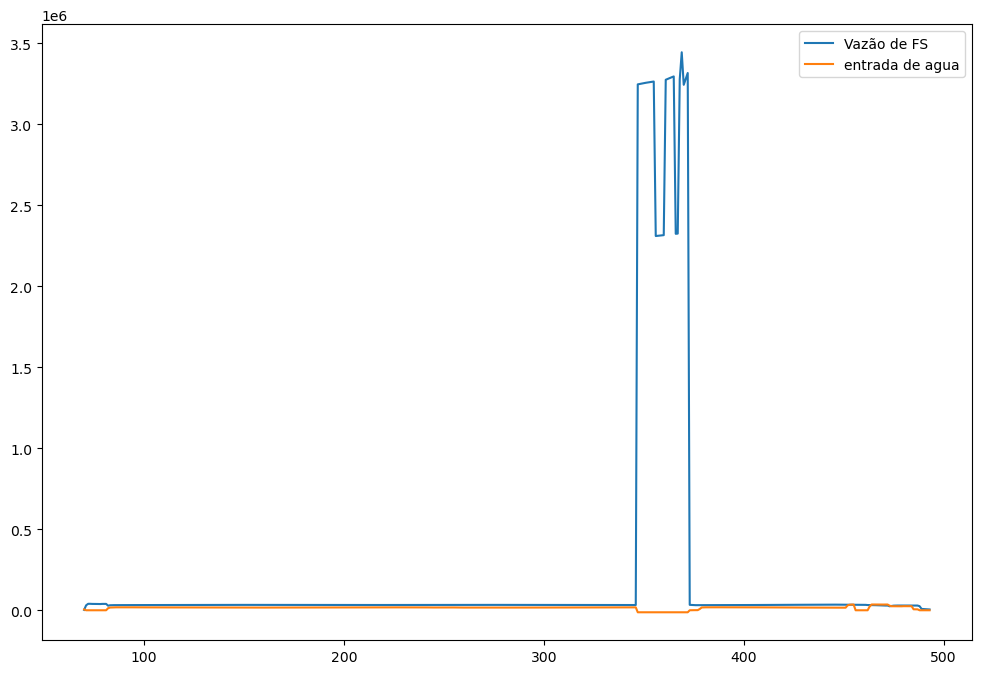

In [88]:
## 0,6
Mosto_final3[['Vazão de FS', 'entrada de agua']].plot(figsize=(12, 8))
plt.show()


In [89]:
Mosto_final3.describe()

,TimeStamp,Controlador Indicador de Nivel CV CONTROLDE ALIMENTACAO DE MOSTO,VAZAO DE MOSTO CALCULADA,AFT DESEJADA NO MOSTO FINAL,AFT DO FS FINAL,Controlador Indicador de Vazao SP ALIMENTACAO DE FS,Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO,Transmissor de Vazao MOSTO ESTERILIZADOR 2,Transmissor de Vazao de FS,Transmissor de Vazao de H2O,Fator Vazão,fator vazão,Vazão de Mosto Desejada,valor do setpoint,Vazão de FS,entrada de agua
count,424,424.000000,424.000000,4.240000e+02,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,424.000000
mean,2024-07-31 10:30:30,0.467158,38197.753750,3.700000e-01,0.669527,17088.340967,19830.638561,39237.544316,16848.916675,17685.961887,0.132842,0.132842,5098.413055,44335.957371,2.155229e+05,14906.169789
min,2024-07-31 06:59:00,0.187500,2092.380000,3.700000e-01,0.007120,0.000000,0.000000,2411.720000,0.000000,0.000000,0.000300,0.000300,10.170117,3255.822000,2.366043e+03,-12408.014685
25%,2024-07-31 08:44:45,0.454325,37400.367500,3.700000e-01,0.712800,19230.075000,18114.820000,39986.810000,19178.107500,17881.562500,0.111400,0.111400,4388.371287,44366.799015,3.227122e+04,16567.026014
50%,2024-07-31 10:30:30,0.473550,38944.230000,3.700000e-01,0.712800,19793.765000,18948.985000,39997.600000,19768.440000,18531.875000,0.126450,0.126450,5015.902243,44977.347991,3.277482e+04,17169.531757
75%,2024-07-31 12:16:15,0.488600,40056.005000,3.700000e-01,0.712800,20686.547500,19600.222500,40008.625000,20664.170000,19234.137500,0.145675,0.145675,5768.912425,45761.968252,3.339103e+04,17820.168473
max,2024-07-31 14:02:00,0.599700,44167.580000,3.700000e-01,0.712800,21324.530000,39975.000000,41907.190000,21333.910000,38489.030000,0.412500,0.412500,14250.246500,54965.236500,3.444609e+06,35659.566173
std,NaN,0.058542,4758.217269,2.223069e-15,0.169505,6779.824729,4707.508536,4346.784507,7017.240947,6367.904484,0.058542,0.058542,2054.782035,5120.797544,7.253214e+05,9068.398232


In [90]:

Mosto_final3['TimeStamp'] = pd.to_datetime(Mosto_final3['TimeStamp'])


Mosto_final3.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame para frequência horária e imprime a coluna 'Transmissor de Vazao de FS'
print(Mosto_final3['Transmissor de Vazao de FS'].resample('H').mean())


TimeStamp
2024-07-31 06:00:00     5047.030000
2024-07-31 07:00:00    16896.559833
2024-07-31 08:00:00    19567.818167
2024-07-31 09:00:00    20645.554333
2024-07-31 10:00:00    19502.573833
2024-07-31 11:00:00    17119.982833
2024-07-31 12:00:00    18612.935000
2024-07-31 13:00:00     6636.136667
2024-07-31 14:00:00        0.000000
Freq: H, Name: Transmissor de Vazao de FS, dtype: float64


In [91]:
print(Mosto_final3['Vazão de FS'].resample('H').mean().sum())

1531084.4349703672


In [92]:
print(Mosto_final2['Transmissor de Vazao de H2O'].resample('H').mean().sum())

130384.73516666668


In [93]:

# Reamostra o DataFrame para frequência horária e imprime a coluna 'Transmissor de Vazao de FS'
print(Mosto_final3['Vazão de FS'].resample('H').mean().sum())


1531084.4349703672


In [103]:
print(Mosto_final3['entrada de agua'].resample('H').mean())

TimeStamp
2024-07-31 06:00:00     5091.534281
2024-07-31 07:00:00    14358.888152
2024-07-31 08:00:00    16815.978028
2024-07-31 09:00:00    17708.491336
2024-07-31 10:00:00    16751.264337
2024-07-31 11:00:00     5554.736442
2024-07-31 12:00:00    15140.661219
2024-07-31 13:00:00    18922.054756
2024-07-31 14:00:00        0.000000
Freq: H, Name: entrada de agua, dtype: float64


In [101]:
print(Mosto_final3['Vazão de Mosto Desejada'].resample('H').mean())

TimeStamp
2024-07-31 06:00:00     844.102000
2024-07-31 07:00:00    6258.711303
2024-07-31 08:00:00    5405.299002
2024-07-31 09:00:00    4943.002681
2024-07-31 10:00:00    5605.241692
2024-07-31 11:00:00    4481.883081
2024-07-31 12:00:00    4713.200352
2024-07-31 13:00:00    4499.795298
2024-07-31 14:00:00    2151.676333
Freq: H, Name: Vazão de Mosto Desejada, dtype: float64


In [95]:
print(Mosto_final3['Transmissor de Vazao de H2O'].resample('H').mean().sum())

130384.73516666668


In [96]:
print(Mosto_final3['Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO'].resample('H').mean())

TimeStamp
2024-07-31 06:00:00     4675.780000
2024-07-31 07:00:00    20603.037833
2024-07-31 08:00:00    18120.109500
2024-07-31 09:00:00    19131.240667
2024-07-31 10:00:00    18069.559833
2024-07-31 11:00:00    19929.923333
2024-07-31 12:00:00    17463.443667
2024-07-31 13:00:00    25392.112000
2024-07-31 14:00:00    26983.120000
Freq: H, Name: Controlador Indicador de Vazao SP AGUARDANDO DESCRIÇAO, dtype: float64


In [97]:
print(Mosto_final3['Transmissor de Vazao MOSTO ESTERILIZADOR 2'].resample('H').mean().sum())

285490.43549999996


In [98]:
densidade_fs = 1.438  # kg/L
densidade_mosto = 1.146  # kg/L

In [99]:
massa_fs = 137760.10 
massa_agua = 130384.73 
massa_mosto = 245490.43 

print(f"Massa total de açúcar (FS) na entrada: {massa_fs} kg")
print(f"Massa total de água na entrada: {massa_agua} kg")
print(f"Massa total de mosto na saída: {massa_mosto} kg")

# Verificação da ART
art_entrada = (137760.10 ) * 0.712
art_saida_desejada = massa_mosto * 0.37

print(f"Massa de ART na entrada: {art_entrada} kg")
print(f"Massa de ART desejada na saída: {art_saida_desejada} kg")

# Verificação se a concentração desejada é atingida
if art_saida_desejada > art_entrada:
    print("A quantidade de ART desejada na saída é maior do que a disponível na entrada. Verifique o processo.")
else:
    print("O balanço de massa está conservado, e a concentração de ART desejada pode ser atingida.")

Massa total de açúcar (FS) na entrada: 137760.1 kg
Massa total de água na entrada: 130384.73 kg
Massa total de mosto na saída: 245490.43 kg
Massa de ART na entrada: 98085.1912 kg
Massa de ART desejada na saída: 90831.4591 kg
O balanço de massa está conservado, e a concentração de ART desejada pode ser atingida.
